In [1]:
%pip install nltk==3.8.1
%pip install spacy==3.7.2
%pip install unidecode==1.3.8
%pip install wikipedia==1.4.0
%pip install matplotlib==3.7.1

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached matplotlib-3.7.1.tar.gz (38.0 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build matplotlib
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Building wheel for matplotlib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [588 lines of output]
      
      Edit mplsetup.cfg to change the build options; suppress output with --quiet.
      
      BUILDING MATPLOTLIB
            python: yes [3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC
                        v.1942 64 bit (AMD64)]]
          platform: yes [win32]
             tests: no  [skipping due to configuration]
            macosx: no  [Mac OS-X only]
      
      C:\Users\jean_\AppData\Local\Temp\pip-build-env-6b7h11z2\overlay\Lib\site-packages\setuptools\dist.py:808: SetuptoolsDeprecationWarning: The namespace_packages parameter is deprecated.
      !!
      
              ********************************************************************************
              Please replace its usage with implicit namespaces (PEP 420).
      
              See https://setuptools.pypa.io/en/latest/reference

In [2]:
import datetime
import sys

import matplotlib.pyplot as plt
from nltk.probability import FreqDist


def calcula_pct_reducao(valor_incial, valor_final):
    return (valor_incial - valor_final) / valor_incial * 100


def plota_frequencia_tokens(tokens, ax, title):
    fd_words = FreqDist(tokens)
    most_common = fd_words.most_common(20)
    words, frequencies = zip(*most_common)
    y_pos = range(len(words))

    ax.barh(y_pos, frequencies, align="center", color="skyblue")
    ax.set_yticks(y_pos)
    ax.set_yticklabels(words, fontsize=10)
    ax.invert_yaxis()

    for i, v in enumerate(frequencies):
        ax.text(v + 0.1, i, str(v), color="black", va="center", fontsize=8)

    ax.set_xlabel("Frequência", fontsize=12)
    ax.set_title(title, fontsize=14, fontweight="bold")
    ax.grid(axis="x", linestyle="--", alpha=0.6)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

In [3]:
import re
import string

import nltk
from nltk.corpus import stopwords

import spacy
from unidecode import unidecode
import wikipedia

In [4]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('rslp')

!spacy download pt_core_news_sm

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jean_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jean_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\jean_\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


     ---------------------------------------- 0.0/13.0 MB ? eta -:--:--
     ---- ----------------------------------- 1.3/13.0 MB 7.4 MB/s eta 0:00:02
     -------- ------------------------------- 2.6/13.0 MB 7.2 MB/s eta 0:00:02
     ------------- -------------------------- 4.5/13.0 MB 7.4 MB/s eta 0:00:02
     ------------------ --------------------- 6.0/13.0 MB 7.7 MB/s eta 0:00:01
     ------------------------ --------------- 7.9/13.0 MB 7.8 MB/s eta 0:00:01
     ---------------------------- ----------- 9.2/13.0 MB 7.6 MB/s eta 0:00:01
     --------------------------------- ------ 10.7/13.0 MB 7.6 MB/s eta 0:00:01
     ------------------------------------- -- 12.3/13.0 MB 7.5 MB/s eta 0:00:01
     ---------------------------------------- 13.0/13.0 MB 7.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [5]:
wikipedia.set_lang("pt")

pln = wikipedia.page("PLN")

corpus = pln.content

print(corpus[0:1000])

Processamento de língua natural (PLN) é uma subárea da ciência da computação, inteligência artificial e da linguística que estuda os problemas da geração e compreensão automática de línguas humanas naturais. Sistemas de geração de língua natural convertem informação de bancos de dados de computadores em linguagem compreensível ao ser humano e sistemas de compreensão de língua natural convertem ocorrências de linguagem humana em representações mais formais, mais facilmente manipuláveis por programas de computador. Alguns desafios do PLN são compreensão de língua natural, fazer com que computadores extraiam sentido de linguagem humana ou natural e geração de língua natural.


== História ==
A história do PLN começou na década de 1950, quando Alan Turing publicou o artigo "Computing Machinery and Intelligence", que propunha o que agora é chamado de teste de Turing como critério de inteligência.
Em 1954, a experiência de Georgetown envolveu a tradução automática de mais de sessenta frases 

In [6]:
tokens_split = corpus.split()

print(tokens_split)
print(len(tokens_split))

['Processamento', 'de', 'língua', 'natural', '(PLN)', 'é', 'uma', 'subárea', 'da', 'ciência', 'da', 'computação,', 'inteligência', 'artificial', 'e', 'da', 'linguística', 'que', 'estuda', 'os', 'problemas', 'da', 'geração', 'e', 'compreensão', 'automática', 'de', 'línguas', 'humanas', 'naturais.', 'Sistemas', 'de', 'geração', 'de', 'língua', 'natural', 'convertem', 'informação', 'de', 'bancos', 'de', 'dados', 'de', 'computadores', 'em', 'linguagem', 'compreensível', 'ao', 'ser', 'humano', 'e', 'sistemas', 'de', 'compreensão', 'de', 'língua', 'natural', 'convertem', 'ocorrências', 'de', 'linguagem', 'humana', 'em', 'representações', 'mais', 'formais,', 'mais', 'facilmente', 'manipuláveis', 'por', 'programas', 'de', 'computador.', 'Alguns', 'desafios', 'do', 'PLN', 'são', 'compreensão', 'de', 'língua', 'natural,', 'fazer', 'com', 'que', 'computadores', 'extraiam', 'sentido', 'de', 'linguagem', 'humana', 'ou', 'natural', 'e', 'geração', 'de', 'língua', 'natural.', '==', 'História', '==', 

In [7]:
padrao = r"\w+(?:'\w+)?|[^\w\s]"
tokens_regex = re.findall(padrao, corpus)

print(tokens_regex)
print(len(tokens_regex))

['Processamento', 'de', 'língua', 'natural', '(', 'PLN', ')', 'é', 'uma', 'subárea', 'da', 'ciência', 'da', 'computação', ',', 'inteligência', 'artificial', 'e', 'da', 'linguística', 'que', 'estuda', 'os', 'problemas', 'da', 'geração', 'e', 'compreensão', 'automática', 'de', 'línguas', 'humanas', 'naturais', '.', 'Sistemas', 'de', 'geração', 'de', 'língua', 'natural', 'convertem', 'informação', 'de', 'bancos', 'de', 'dados', 'de', 'computadores', 'em', 'linguagem', 'compreensível', 'ao', 'ser', 'humano', 'e', 'sistemas', 'de', 'compreensão', 'de', 'língua', 'natural', 'convertem', 'ocorrências', 'de', 'linguagem', 'humana', 'em', 'representações', 'mais', 'formais', ',', 'mais', 'facilmente', 'manipuláveis', 'por', 'programas', 'de', 'computador', '.', 'Alguns', 'desafios', 'do', 'PLN', 'são', 'compreensão', 'de', 'língua', 'natural', ',', 'fazer', 'com', 'que', 'computadores', 'extraiam', 'sentido', 'de', 'linguagem', 'humana', 'ou', 'natural', 'e', 'geração', 'de', 'língua', 'natural

In [8]:
tokens_nltk = nltk.word_tokenize(corpus, language="portuguese")

print(tokens_nltk)
print(len(tokens_nltk))

['Processamento', 'de', 'língua', 'natural', '(', 'PLN', ')', 'é', 'uma', 'subárea', 'da', 'ciência', 'da', 'computação', ',', 'inteligência', 'artificial', 'e', 'da', 'linguística', 'que', 'estuda', 'os', 'problemas', 'da', 'geração', 'e', 'compreensão', 'automática', 'de', 'línguas', 'humanas', 'naturais', '.', 'Sistemas', 'de', 'geração', 'de', 'língua', 'natural', 'convertem', 'informação', 'de', 'bancos', 'de', 'dados', 'de', 'computadores', 'em', 'linguagem', 'compreensível', 'ao', 'ser', 'humano', 'e', 'sistemas', 'de', 'compreensão', 'de', 'língua', 'natural', 'convertem', 'ocorrências', 'de', 'linguagem', 'humana', 'em', 'representações', 'mais', 'formais', ',', 'mais', 'facilmente', 'manipuláveis', 'por', 'programas', 'de', 'computador', '.', 'Alguns', 'desafios', 'do', 'PLN', 'são', 'compreensão', 'de', 'língua', 'natural', ',', 'fazer', 'com', 'que', 'computadores', 'extraiam', 'sentido', 'de', 'linguagem', 'humana', 'ou', 'natural', 'e', 'geração', 'de', 'língua', 'natural

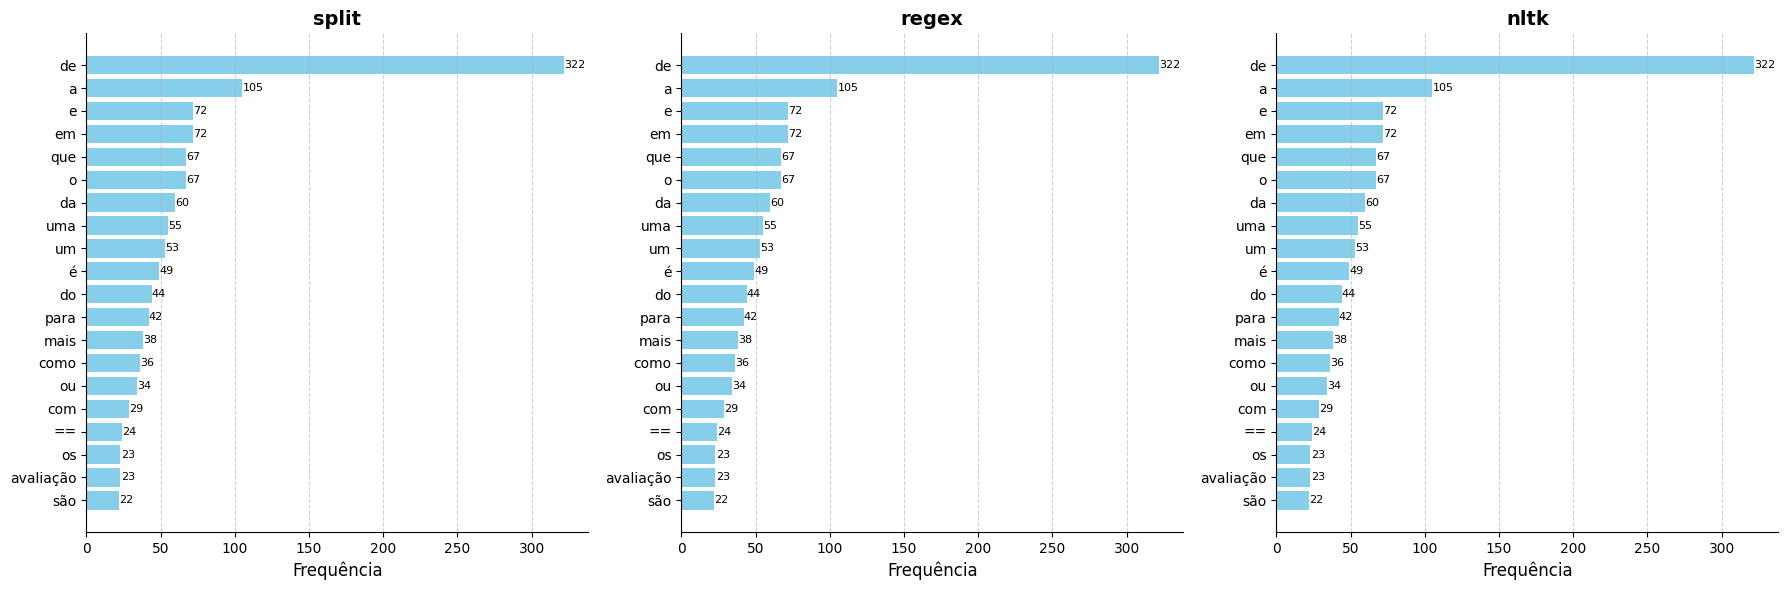

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

plota_frequencia_tokens(tokens_split, axs[0], "split")
plota_frequencia_tokens(tokens_split, axs[1], "regex")
plota_frequencia_tokens(tokens_split, axs[2], "nltk")

plt.tight_layout()
plt.show()

In [10]:
tokens_regex_minusculo = [token.lower() for token in tokens_regex]

In [13]:
portugues_stops = stopwords.words("portuguese")
tokens_sem_stopwords = [
    token for token in tokens_regex_minusculo if token not in portugues_stops
]

print(len(tokens_sem_stopwords))

3306


In [14]:
tokens_sem_numeros = [
    re.sub(r"\d+", "", palavra)
    for palavra in tokens_sem_stopwords
    if re.sub(r"\d+", "", palavra)
]

print(len(tokens_sem_numeros))

3236


In [18]:
tokens_sem_pontuacao = [
    token for token in tokens_sem_numeros if token not in string.punctuation
]

print(len(tokens_sem_pontuacao))

2500


In [21]:
tokens_sem_acentos = [unidecode(token) for token in tokens_sem_pontuacao]

print(len(tokens_sem_acentos))

2500


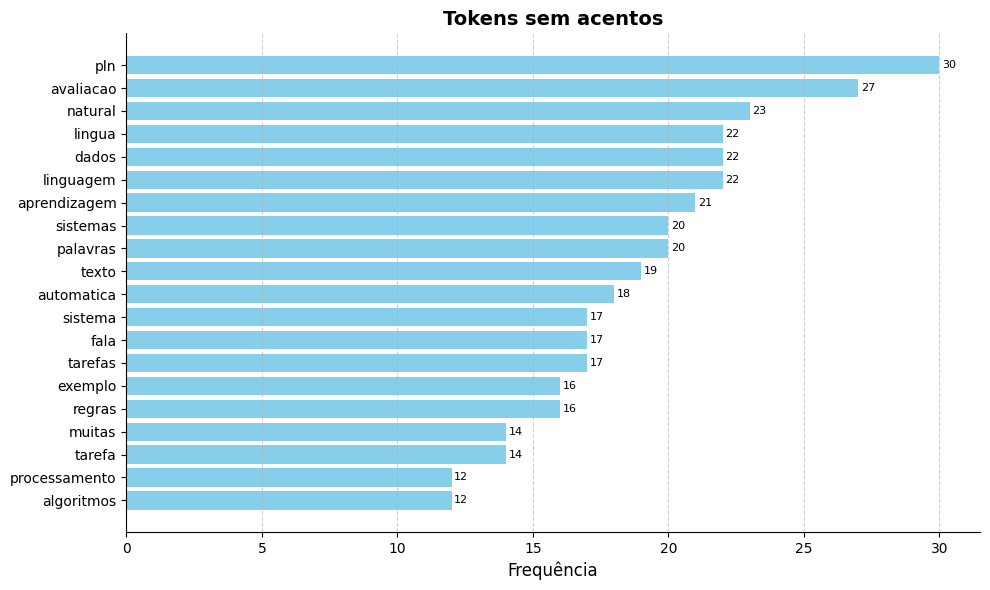

In [22]:
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

plota_frequencia_tokens(tokens_sem_acentos, axs, "Tokens sem acentos")

plt.tight_layout()
plt.show()

In [23]:
stemmed = nltk.stem.RSLPStemmer()

tokens_stemmed = [stemmed.stem(token) for token in tokens_sem_acentos]

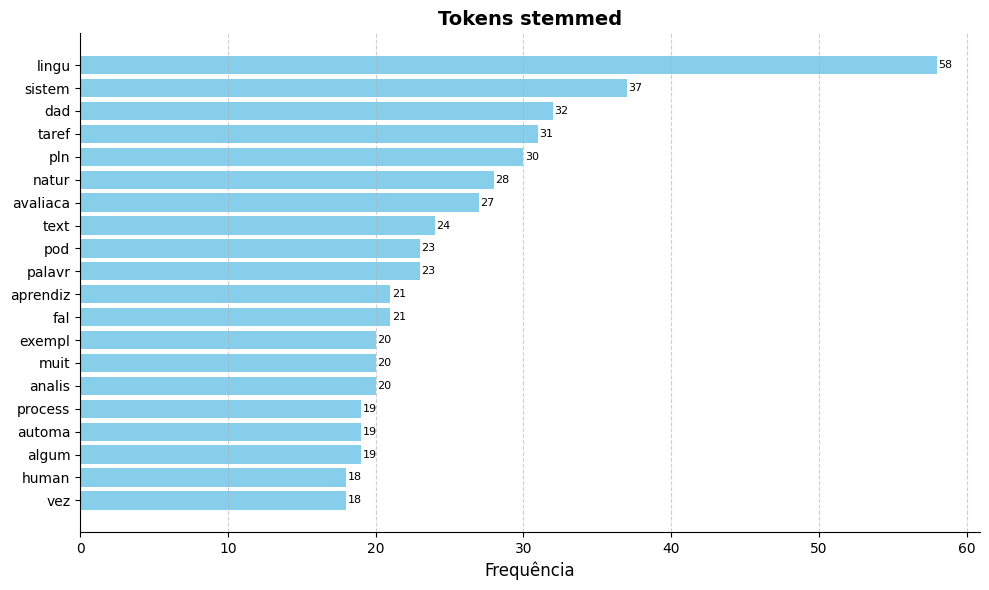

In [24]:
fig, axs = plt.subplots(1,1,figsize=(10,6))

plota_frequencia_tokens(tokens_stemmed,axs,"Tokens stemmed")

plt.tight_layout()
plt.show()

In [28]:
nlp = spacy.load("pt_core_news_sm")

str_tokens = " ".join(tokens_sem_pontuacao)

doc = nlp(str_tokens)

tokens_lemm = [token.lemma_ for token in doc]

print(len(tokens_lemm))

2501


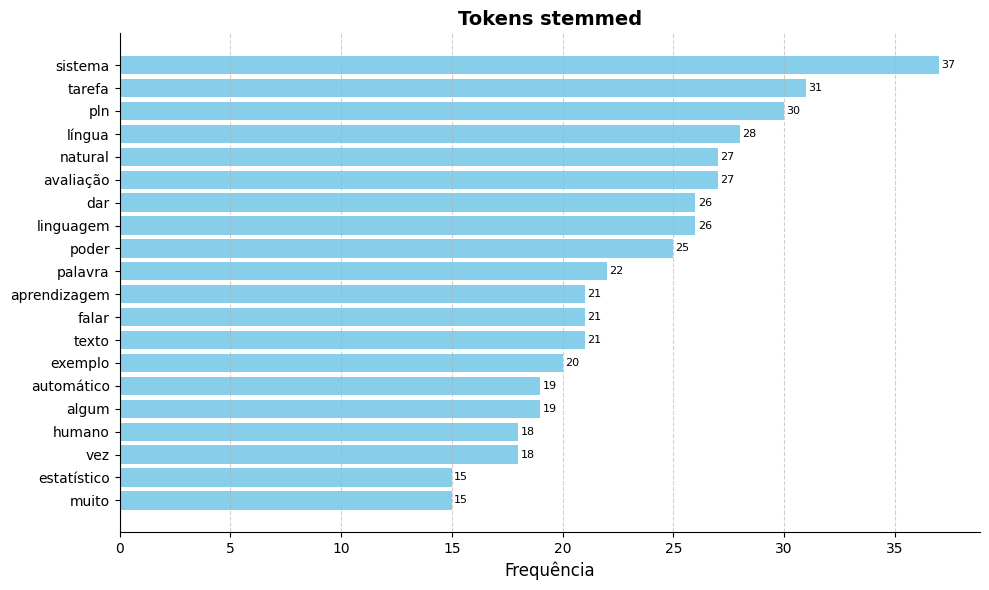

In [29]:
fig, axs = plt.subplots(1,1,figsize=(10,6))

plota_frequencia_tokens(tokens_lemm,axs,"Tokens stemmed")

plt.tight_layout()
plt.show()